In [2]:
import pandas as pd, tensorflow as tf, matplotlib.pyplot as plt, numpy as np
from   sklearn.model_selection import train_test_split
from   sklearn.metrics import mean_squared_error
from   math import sqrt

#Big Data Import
db=pd.read_excel('SRB.xlsx')

#Data Extraction
y1 = db ["As_opt"]
y2 = db ["d_opt"]
x  = db [["fc","fy","Mu","b"]]

#Split Training Testing Data
xtrain,xtest,ytrain1,ytest1,ytrain2,ytest2 = train_test_split(x,y1,y2,test_size=0.2,random_state=1) 

#RMSE def
def rmse(ytrue,ypred):
  return tf.sqrt(tf.reduce_mean(tf.square(ytrue - ypred)))

In [3]:
#ANN Asopt model def
mdl_Asopt=tf.keras.Sequential([
    tf.keras.layers.Dense(40,activation="relu",input_shape=(xtrain.shape[1],)),
    tf.keras.layers.Dense(40,activation="relu"),
    tf.keras.layers.Dense(40,activation="relu"),
    tf.keras.layers.Dense(40,activation="relu"),
    tf.keras.layers.Dense(1)])

#Model Config
mdl_Asopt.compile(optimizer='adam',loss=rmse)

#Model Training
mdl_Asopt.fit(xtrain,ytrain1,epochs=15,verbose=True)

#ANN dopt model def
mdl_dopt = tf.keras.Sequential([
    tf.keras.layers.Dense(40,activation="relu",input_shape=(xtrain.shape[1],)),
    tf.keras.layers.Dense(40,activation="relu"),
    tf.keras.layers.Dense(40,activation="relu"),
    tf.keras.layers.Dense(40,activation="relu"),
    tf.keras.layers.Dense(40,activation="relu"),
    tf.keras.layers.Dense(1)])

#Model Config
mdl_dopt.compile(optimizer='adam',loss = rmse)

#Model Training
mdl_dopt.fit(xtrain,ytrain2,epochs=15,verbose=True)



Epoch 1/15

80/80 [==============================] - 2s 3ms/step - loss: 1.8874
Epoch 2/15
80/80 [==============================] - 0s 2ms/step - loss: 1.0027
Epoch 3/15
80/80 [==============================] - 0s 2ms/step - loss: 1.0322
Epoch 4/15
80/80 [==============================] - 0s 2ms/step - loss: 0.9204
Epoch 5/15
80/80 [==============================] - 0s 2ms/step - loss: 0.5005
Epoch 6/15
80/80 [==============================] - 0s 2ms/step - loss: 0.5947
Epoch 7/15
80/80 [==============================] - 0s 3ms/step - loss: 0.5997
Epoch 8/15
80/80 [==============================] - 0s 2ms/step - loss: 0.3451
Epoch 9/15
80/80 [==============================] - 0s 2ms/step - loss: 0.5762
Epoch 10/15
80/80 [==============================] - 0s 2ms/step - loss: 0.8564
Epoch 11/15
80/80 [==============================] - 0s 2ms/step - loss: 0.6823
Epoch 12/15
80/80 [==============================] - 0s 2ms/step - loss: 0.4603
Epoch 13/15
80/80 [===========================

PLOTEO DEL MODELO DE "AS (cm^2)"


80/80 [==============================] - 0s 3ms/step


Text(0.5, 1.0, 'Model 3 layers & 20 neurons // Data Training (Epoch = 150)')

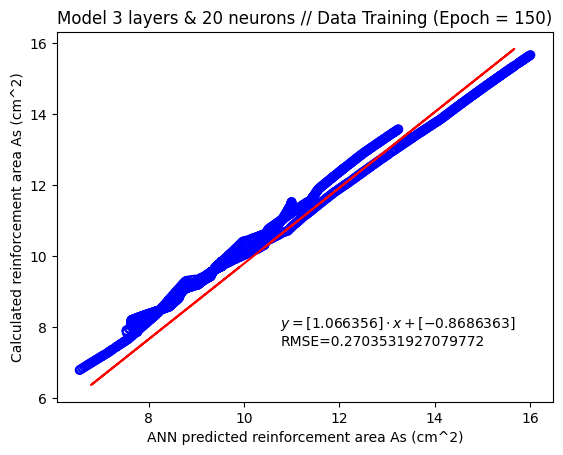

In [8]:
#Plotting
ypred=mdl_Asopt.predict(xtrain)

RMSE=sqrt(mean_squared_error(ytrain1,ypred))

# Coefficients
m, b = np.polyfit(ytrain1, ypred, 1)

#Plotting scatter points and 1st-degree polynom
plt.scatter(ypred,ytrain1,facecolors = 'none',edgecolors='b')
plt.plot(ytrain1, m*ytrain1 + b, color='red')

# Information Plot
plt.text(0.45, 0.2, f'$y = {m} \cdot x + {b}$', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.45, 0.15, f'RMSE={RMSE}', fontsize=10, transform=plt.gca().transAxes)

plt.xlabel('ANN predicted reinforcement area As (cm^2)')
plt.ylabel('Calculated reinforcement area As (cm^2)')
plt.title('Model 3 layers & 20 neurons // Data Training (Epoch = 150)')

20/20 [==============================] - 0s 1ms/step


Text(0.5, 1.0, 'Model 3 layers & 20 neurons // Data Training (Epoch = 150)')

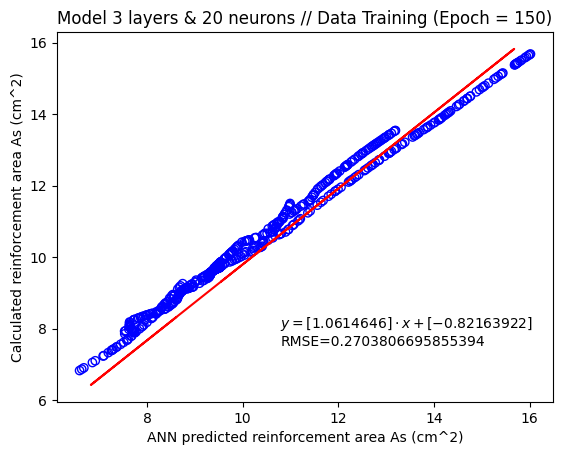

In [5]:
#Ploteando los Resultados
ypred1=mdl_Asopt.predict(xtest)
RMSE=sqrt(mean_squared_error(ytest1,ypred1))

# Obtenemos los coeficientes de la recta de regresión
m, b = np.polyfit(ytest1, ypred1, 1)

plt.scatter(ypred1,ytest1,facecolors = 'none',edgecolors='b')
plt.plot(ytest1, m*ytest1 + b, color='red')

# Añadimos la ecuación de la recta de regresión al gráfico y el valor del RMSE
plt.text(0.45, 0.2, f'$y = {m} \cdot x + {b}$', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.45, 0.15, f'RMSE={RMSE}', fontsize=10, transform=plt.gca().transAxes)

plt.xlabel('ANN predicted reinforcement area As (cm^2)')
plt.ylabel('Calculated reinforcement area As (cm^2)')
plt.title('Model 3 layers & 20 neurons // Data Training (Epoch = 150)')

In [6]:
#Extracción de datos del paper
db1 = pd.read_excel("JAAD.db.xlsx",sheet_name="Sheet1")
xppr = db1[["fc","fy","Mu","b"]]
yppr = db1["Asopt"]

#Evaluación en el Modelo entrenado por ANN
ypred = mdl_Asopt.predict(xppr)

RMSE = sqrt(mean_squared_error(yppr,ypred))

# Obtenemos los coeficientes de la recta de regresión
m, b = np.polyfit(yppr, ypred, 1)

plt.scatter(ypred,yppr,facecolors = 'none',edgecolors='b')
plt.plot(yppr, m*yppr + b, color='red')

# Añadimos la ecuación de la recta de regresión al gráfico y el valor del RMSE
plt.text(0.45, 0.2, f'$y = {m} \cdot x + {b}$', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.45, 0.15, f'RMSE={RMSE}', fontsize=10, transform=plt.gca().transAxes)

plt.xlabel('ANN predicted reinforcement area As (cm^2)')
plt.ylabel('Calculated reinforcement area As (cm^2)')
plt.title('Model 3 layers & 20 neurons // Data Validating (Epoch = 50)')

FileNotFoundError: [Errno 2] No such file or directory: 'JAAD.db.xlsx'

PLOTEO DEL MODELO DE "d (cm)"

In [ ]:
#Ploteando resultados
y_pred = mdl_dopt.predict(xtrain)

RMSE = sqrt(mean_squared_error(ytrain2,y_pred))

# Obtenemos los coeficientes de la recta de regresión
m, b = np.polyfit(ytrain2, y_pred, 1)

plt.scatter(y_pred,ytrain2,facecolors = 'none',edgecolors='b')
plt.plot(ytrain2, m*ytrain2 + b, color='red')

# Añadimos la ecuación de la recta de regresión al gráfico y el valor del RMSE
plt.text(0.45, 0.2, f'$y = {m} \cdot x + {b}$', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.45, 0.15, f'RMSE={RMSE}', fontsize=10, transform=plt.gca().transAxes)

plt.xlabel('ANN predicted depth d (cm)')
plt.ylabel('Calculated depth d (cm)')
plt.title('Model 3 layers & 20 neurons // Data Training (Epoch = 150)')	

In [ ]:
y_pred = mdl_dopt.predict(xtest)

RMSE = sqrt(mean_squared_error(ytest2,y_pred))

# Obtenemos los coeficientes de la recta de regresión
m, b = np.polyfit(ytest2, y_pred, 1)

plt.scatter(y_pred,ytest2,facecolors = 'none',edgecolors='b')
plt.plot(ytest2, m*ytest2 + b, color='red')

# Añadimos la ecuación de la recta de regresión al gráfico y el valor del RMSE
plt.text(0.45, 0.2, f'$y = {m} \cdot x + {b}$', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.45, 0.15, f'RMSE={RMSE}', fontsize=10, transform=plt.gca().transAxes)

plt.xlabel('ANN predicted depth d (cm)')
plt.ylabel('Calculated depth d (cm)')
plt.title('Model 3 layers & 20 neurons // Data Testing (Epoch = 150)')

In [ ]:
#Extracción de datos del paper
datos_paper = pd.read_excel("JAAD.db.xlsx",sheet_name="Sheet1")
x_paper = datos_paper[["fc","fy","Mu","b"]]
y_paper = datos_paper["dopt"]

#Evaluación en el Modelo entrenado por ANN
y_pred = mdl_dopt.predict(x_paper)

RMSE = sqrt(mean_squared_error(y_paper,y_pred))

# Obtenemos los coeficientes de la recta de regresión
m, b = np.polyfit(y_paper, y_pred, 1)

plt.scatter(y_pred,y_paper,facecolors = 'none',edgecolors='b')
plt.plot(y_paper, m*y_paper + b, color='red')

# Añadimos la ecuación de la recta de regresión al gráfico y el valor del RMSE
plt.text(0.45, 0.2, f'$y = {m} \cdot x + {b}$', fontsize=10, transform=plt.gca().transAxes)
plt.text(0.45, 0.15, f'RMSE={RMSE}', fontsize=10, transform=plt.gca().transAxes)

plt.xlabel('ANN predicted depth d (cm)')
plt.ylabel('Calculated depth d (cm)')
plt.title('Model 3 layers & 20 neurons // Data Validating (Epoch = 50)')

In [ ]:
import pandas as pd
#Datos de ETABS
fc = [21]
fy = [400]
Mu = [400]
b = [300]

#Almacenamiento de datos del ETABS
data_Etabs = pd.DataFrame()
data_Etabs['fc'] = fc
data_Etabs['fy'] = fy
data_Etabs['Mu'] = Mu
data_Etabs['b'] = b

#Evaluación en el Modelo entrenado por ANN
y_As = mdl_Asopt.predict(data_Etabs)
y_d = mdl_dopt.predict(data_Etabs)

imprimir = f"El Área de Acero (As) es {y_As} cm^2 y el peralte efectivo (d) es {y_d} cm"
print(imprimir)